this notebook contains logistic regression analysis of the meteorite ml data

In [1]:
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float
import psycopg2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopy
from geopy.geocoders import Nominatim
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# pull in machine learning data
ml_unscaled = pd.read_csv('Resources/machine_learning/meteorite_ml_unscaled.csv')
print(len(ml_unscaled))
ml_unscaled.head(2)

1648


,Unnamed: 0,mass_grams,fall,year,reclat,reclong,elevation,FIPS,area_sqkm,BARE,...,SHRUBL,SPARSE_VEGETATION,URBAN,WATER,WETL,Achrondrite,Chrondrite,Iron,Mesosiderite,Pallasite
0,0,32000.0,0,1899,42.53333,-85.88333,225.0,26,250487,0.241572,...,0.668927,0.026182,3.350872,2.644462,0.312346,0,1,0,0,0
1,1,469.0,0,1994,43.76111,-84.50778,218.0,26,250487,0.241572,...,0.668927,0.026182,3.350872,2.644462,0.312346,0,1,0,0,0


In [4]:
collist = ml_unscaled.columns.to_list()

In [5]:
# try to force all cols to numeric  from Mod19-Day03-Act-05
for col in ml_unscaled.columns:
    if ml_unscaled[col].dtype == 'object':
        ml_unscaled[col] = pd.to_numeric(ml_unscaled[col], errors='coerce')

In [6]:
# set x and y
X = ml_unscaled.drop('fall', axis=1)
y = ml_unscaled['fall']
print(len(X))
print(type(X))
print(X)


1648
<class 'pandas.core.frame.DataFrame'>
      Unnamed: 0  mass_grams  year    reclat    reclong  elevation  FIPS  \
0              0     32000.0  1899  42.53333  -85.88333      225.0    26   
1              1       469.0  1994  43.76111  -84.50778      218.0    26   
2              2     10600.0  1921  44.51667  -83.95000      387.0    26   
3              3      1551.0  1997  42.38467  -83.61150      279.0    26   
4              4     51700.0  1883  42.96667  -85.76667      225.0    26   
...          ...         ...   ...       ...        ...        ...   ...   
1643        1643    111000.0  1926  42.33333 -113.70000     1914.0    16   
1644        1644      2150.0  1940  43.80000 -117.00000      670.0    16   
1645        1645        41.0  2004  44.93389 -116.43167     1556.0    16   
1646        1646     26600.0  1982  43.72444 -116.91167      716.0    16   
1647        1647       353.0  1963  42.31667  -72.63333       51.0    25   

      area_sqkm      BARE      CROPL  ...   

In [7]:
print(len(y))
print(type(y))
print(y)

1648
<class 'pandas.core.series.Series'>
0       0
1       0
2       0
3       0
4       1
       ..
1643    1
1644    1
1645    1
1646    1
1647    1
Name: fall, Length: 1648, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
clf = LogisticRegression(random_state=1, max_iter= 100,).fit(X_train_scaled, y_train)
print(f'Logistic Regression Training Score is: {clf.score(X_train_scaled, y_train)}')
print(f'Logistic Regression Testing Score is: {clf.score(X_test_scaled, y_test)}')

Logistic Regression Training Score is: 0.9490291262135923
Logistic Regression Testing Score is: 0.9538834951456311


In [35]:
len(y_test)

412

In [15]:
print(f'Actual:\t\t{list(y_test[:])}')
print(f'Predicted:\t{list(clf.predict(X_test[:]))}')

Actual:		[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

c:\Users\chris\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [16]:
actual = list(y_test[:])
predicted = list(clf.predict(X_test[:]))

c:\Users\chris\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
print(type(actual))
print(actual[0:10])
print(type(predicted))
predicted[0:10]

<class 'list'>
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
<class 'list'>


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [23]:
logR_dict = {'actual':actual,'predicted':predicted}
logR_df = pd.DataFrame(logR_dict)
logR_df.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [24]:
logR_df['accurate'] = logR_df['actual']+logR_df['predicted']
logR_df.head()

,actual,predicted,accurate
0,1,1,2
1,1,1,2
2,1,1,2
3,1,1,2
4,1,1,2


In [26]:
logR_df['accurate'] .replace({2:'yes',1:'no',0:'yes'}, inplace = True)


In [27]:
logR_df.head()

,actual,predicted,accurate
0,1,1,yes
1,1,1,yes
2,1,1,yes
3,1,1,yes
4,1,1,yes


In [31]:
pineapple = logR_df['accurate'].value_counts()
print(type(pineapple))
pineapple

<class 'pandas.core.series.Series'>


yes    377
no      35
Name: accurate, dtype: int64

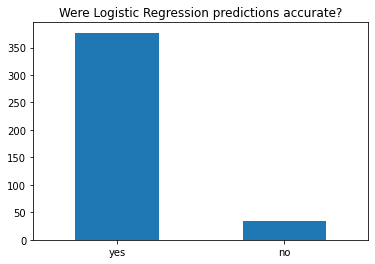

In [34]:
pineapple.plot.bar(rot = 0, title = 'Were Logistic Regression predictions accurate?')
